In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation



In [ ]:

%cd /content/drive/My Drive/SPCUP

/content/drive/My Drive/SPCUP


In [ ]:

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

#the error is due the mismatch of the number of channels in the input image vs the model 
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())
#just copy paste the previous code f
classifier.add(Dense(128, activation='relu' ))
classifier.add(Dropout(0.2))
classifier.add(Dense(1, activation='sigmoid'))

#classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

classifier.summary()
# Compiling the CNN
opt=SGD(lr=0.001,momentum=0.9)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [ ]:
classifier.load_weights('/content/drive/My Drive/SPCUP/weights.best.hdf5')

In [ ]:
# Compiling the CNN
#classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator





In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

#is train the train directory in gdrive??
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set,
                         steps_per_epoch = 468 // 32,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps= 115// 32)




Found 468 images belonging to 2 classes.
Found 115 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.


KeyboardInterrupt: ignored

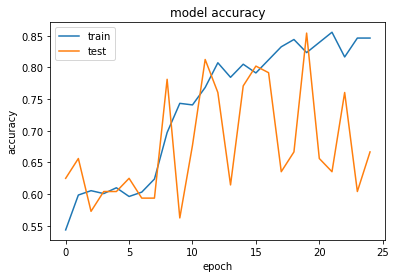

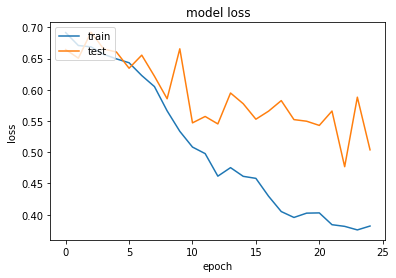

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
%cd /content/drive/My Drive/SPCUP
import tensorflow as tf
tf.keras.models.Model() 
tf.keras.models.save_model(classifier,'model1.h5')


/content/drive/My Drive/SPCUP


In [ ]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 468 images belonging to 2 classes.
Found 115 images belonging to 2 classes.


In [ ]:
classifier.evaluate(test_set)

4/4 [==============================] - 6s 1s/step - loss: 0.4940 - accuracy: 0.8522


[0.49396514892578125, 0.852173924446106]

In [ ]:
import pandas as pd
res = pd.DataFrame(classifier.predict_classes(test_set))